<img src="https://raw.githubusercontent.com/lyceeHM/Terminale_Spe/master/python_lycee.png">
<div id="titre">
<h1 style="color:white;
  font-family:Comic Sans MS;
  font-size:3em;
  background-color:black;
  text-align:center;
  padding:5px">Rentabilité locative d'un bien immobilier</h1>
<div style="font-family:Comic Sans MS; background-color:#888;box-shadow: 8px 8px 0px #aaa; text-align:center; width: 50%; color:white">TSTMG : simulation de Monte - Carlo</div>
</div>

<div style="color:black;font-size:2em;font-weight:bold">Présentation :</div>
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px">
    Un bien immobilier coûte $103\,000$ € (prix à l'achat + travaux de rénovation).
    <br> Pour un loyer donné, deux paramètres demeurent <b><u>aléatoires</u></b> :
    <ul>
        <li> $X$ le nombre de mois vaccants </li>
        <li> $Y$ le montant des travaux d'entretiens </li>
    </ul>
</blockquote>

<h1 style="font-family:Comic Sans MS;color:white;background-color:#B9B9B9;text-align:center"> <span style="font-size:2em;font-weight:bold;padding-right: 60px;color:black;"> A.</span> Loi de probabilité de $X$</h1> 

<div style="color:black;font-size:2em;font-weight:bold">Données statistiques fournies :</div>
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px">
    Une étude statistique a été menée concernant ce bien destiné à la location.
    <br> Les données sont stockées dans le fichier excel <b>location.xls</b> ci-dessous :
</blockquote>

In [1]:
%%html
<iframe src="https://docs.google.com/spreadsheets/d/e/2PACX-1vQYevX9Fm-V6YDscs4lm0j118UMh3daV-6kLPVmX31Md69wzAQiYQLwJ3z1mnMlfg/pubhtml?widget=true&amp;headers=false" style="height:300px"></iframe>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">1.</span> Exécuter le code suivant pour charger la distribution des fréquences des mois vacants.

In [1]:
import pandas as pa

V = pa.read_excel('location.xls', sheet_name = 'Vacations')
V

,Mois,Fréquences
0,0,0.40
1,1,0.30
2,2,0.15
3,3,0.05
4,4,0.05
5,5,0.05


<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;color:white">1.</span> Exécuter le code suivant pour visualiser cette distribution.

<AxesSubplot:xlabel='Mois'>

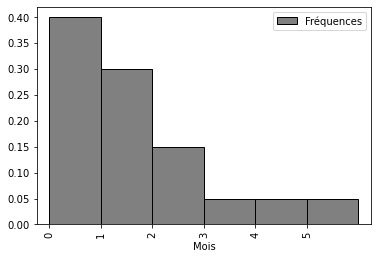

In [2]:
V.plot.bar(x = 'Mois', y = 'Fréquences', 
           align = 'edge', width = 1, 
           edgecolor = 'black', facecolor = 'gray')

<div style="color:black;font-size:2em;font-weight:bold">Loi de probabilité de $X$ :</div> 
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;"> 
    <table style="border-style:solid;border: 1px solid black;"><tbody>    <tr><td style="text-align: right;border: 1px solid black;"><b>$X$</b></td><td style="text-align: right;border: 1px solid black;">0  </td><td style="text-align: right;border: 1px solid black;">1  </td><td style="text-align: right;border: 1px solid black;">2   </td><td style="text-align: right;border: 1px solid black;">3   </td><td style="text-align: right;border: 1px solid black;">4   </td><td style="text-align: right;border: 1px solid black;">5   </td></tr>    <tr><td style="text-align: right;border: 1px solid black;"><b>Probabilité</b></td><td style="text-align: right;border: 1px solid black;">0.4</td><td style="text-align: right;border: 1px solid black;">0.3</td><td style="text-align: right;border: 1px solid black;">0.15</td><td style="text-align: right;border: 1px solid black;">0.05</td><td style="text-align: right;border: 1px solid black;">0.05</td><td style="text-align: right;border: 1px solid black;">0.05</td></tr></tbody></table>
</blockquote>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Exécuter le code suivant pour charger la fonction <b>choices</b> du module <b>random</b>.

In [3]:
from random import choices

<span style="color:white;font-size:2em;font-weight:bold;padding-right: 30px;">1.</span> Exécuter le code suivant pour obtenir une réalisation de $X$ :

In [4]:
choices(V['Mois'], V['Fréquences'], k = 1)[0]

0

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">3.</span> La fonction <b>SX</b> <em>(sans paramètre)</em> ci-dessous, renvoie une simulation de $X$.

In [5]:
def SX():
    return choices(V['Mois'], V['Fréquences'], k = 1)[0]

<span style="color:white;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Pour obtenir de nouveau une valeur simulée de $X$, il suffit d'exécuter le code suivant :

In [6]:
SX()

1

<h1 style="font-family:Comic Sans MS;color:white;background-color:#B9B9B9;text-align:center"> <span style="font-size:2em;font-weight:bold;padding-right: 60px;color:black;"> B.</span> Loi de probabilité de $Y$</h1> 

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">1.</span> Exécuter le code suivant pour charger la distribution des fréquences du montant des travaux.

In [7]:
T = pa.read_excel('location.xls', sheet_name = 'Travaux')
T

,Montants,Fréquences
0,100,0.02
1,200,0.03
2,300,0.04
3,400,0.06
4,500,0.09
5,600,0.10
6,700,0.08
7,800,0.08
8,900,0.06
9,1000,0.05


<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;color:white">1.</span> Exécuter le code suivant pour visualiser cette distribution.

<AxesSubplot:xlabel='Montants'>

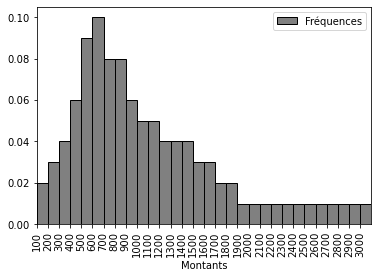

In [8]:
T.plot.bar(x = 'Montants', y = 'Fréquences', 
           align = 'edge', width = 100, 
           edgecolor = 'black', facecolor = 'gray')

<div style="color:black;font-size:2em;font-weight:bold">Loi de probabilité de $Y$</div> 
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px">
    <table><tr><td style="border:1px solid black;"><b><b>$Y$</b></b></td><td style="text-align: right;border:1px solid black;">100   </td><td style="text-align: right;border:1px solid black;">200   </td><td style="text-align: right;border:1px solid black;">300   </td><td style="text-align: right;border:1px solid black;">400   </td><td style="text-align: right;border:1px solid black;">500   </td><td style="text-align: right;border:1px solid black;">600  </td><td style="text-align: right;border:1px solid black;">700   </td><td style="text-align: right;border:1px solid black;">800   </td><td style="text-align: right;border:1px solid black;">900   </td><td style="text-align: right;border:1px solid black;">1000   </td><td style="text-align: right;border:1px solid black;">1100   </td><td style="text-align: right;border:1px solid black;">1200   </td><td style="text-align: right;border:1px solid black;">1300   </td><td style="text-align: right;border:1px solid black;">1400   </td><td style="text-align: right;border:1px solid black;">1500   </td><td style="text-align: right;border:1px solid black;">1600   </td><td style="text-align: right;border:1px solid black;">1700   </td><td style="text-align: right;border:1px solid black;">1800   </td><td style="text-align: right;border:1px solid black;">1900   </td><td style="text-align: right;border:1px solid black;">2000   </td><td style="text-align: right;border:1px solid black;">2100   </td><td style="text-align: right;border:1px solid black;">2200   </td><td style="text-align: right;border:1px solid black;">2300   </td><td style="text-align: right;border:1px solid black;">2400   </td><td style="text-align: right;border:1px solid black;">2500   </td><td style="text-align: right;border:1px solid black;">2600   </td><td style="text-align: right;border:1px solid black;">2700   </td><td style="text-align: right;border:1px solid black;">2800   </td><td style="text-align: right;border:1px solid black;">2900   </td><td style="text-align: right;border:1px solid black;">3000   </td></tr>    <tr><td style="border:1px solid black;"><b>Probabilité</b>   </td><td style="text-align: right;border:1px solid black;">  0.02</td><td style="text-align: right;border:1px solid black;">  0.03</td><td style="text-align: right;border:1px solid black;">  0.04</td><td style="text-align: right;border:1px solid black;">  0.06</td><td style="text-align: right;border:1px solid black;">  0.09</td><td style="text-align: right;border:1px solid black;">  0.1</td><td style="text-align: right;border:1px solid black;">  0.08</td><td style="text-align: right;border:1px solid black;">  0.08</td><td style="text-align: right;border:1px solid black;">  0.06</td><td style="text-align: right;border:1px solid black;">   0.05</td><td style="text-align: right;border:1px solid black;">   0.05</td><td style="text-align: right;border:1px solid black;">   0.04</td><td style="text-align: right;border:1px solid black;">   0.04</td><td style="text-align: right;border:1px solid black;">   0.04</td><td style="text-align: right;border:1px solid black;">   0.03</td><td style="text-align: right;border:1px solid black;">   0.03</td><td style="text-align: right;border:1px solid black;">   0.02</td><td style="text-align: right;border:1px solid black;">   0.02</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td><td style="text-align: right;border:1px solid black;">   0.01</td></tr></table>
</blockquote>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Compléter la fonction <b>SY</b> <em>(sans paramètre)</em> ci-dessous, qui renvoie une simulation de $Y$.

In [9]:
def SY():
    return choices(T['Montants'], T['Fréquences'], k = 1)[0]

<span style="color:white;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Pour obtenir de nouveau une valeur simulée de $Y$, il suffit d'exécuter le code suivant :

In [10]:
SY()

1000

<h1 style="font-family:Comic Sans MS;color:white;background-color:#B9B9B9;text-align:center"> <span style="font-size:2em;font-weight:bold;padding-right: 60px;color:black;"> C.</span> Revenus locatifs</h1>

<div style="color:black;font-size:2em;font-weight:bold">Définitions :</div> 
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px">
    <ul>
        <li>Les <b>revenus locatifs</b> sont les loyers perçus sur l'année.</li>
        <li>Les <b>frais annuels</b> sont constitués de :
    <br>
<style>
      table {
        border-collapse: collapse;
      }
      td {border: 1px solid black;},
      th {
        padding: 10px;
        border-bottom: 2px solid #8ebf42;
        text-align: center;
      }
</style>
<table style="border-width:2px;border-style:solid;border-color:#F0573B" width="420">
    <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:center;"bgcolor='white'>Charges copropriété</td>
           <td style="border:2px solid black;text-align:center;"bgcolor='white'>600 €</td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:center;"bgcolor='white'>Assurances (PNO, loyers impayés)</td>
       <td style="border:2px solid black;text-align:center;"bgcolor='white'>220 €</td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:center;"bgcolor='white'>Taxe foncière</td>
       <td style="border:2px solid black;text-align:center;"bgcolor='white'>800 €</td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:center;"bgcolor='white'>Gestion locative</td>
       <td style="border:2px solid black;text-align:center;"bgcolor='white'>1 000 €</td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:center;"bgcolor='white'>Travaux d'entretiens</td>
       <td style="border:2px solid black;text-align:center;"bgcolor='white'> $Y$ </td>
   </tr>
</table>
        </li>
        <li>Le <b>gain</b> <em>(algébrique)</em> obtenu lors de la location est l'argent récolté par le propriétaire.</li>
        <li> Le <b>rendement locatif <em>(net)</em></b> est la part du gain <em>(algébrique)</em> relativement au prix du bien. </li>
    </ul>
</blockquote>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">1.</span> L'apartement est loué $680€$ par mois durant une année. 
<br><span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;color:white">1.</span> Exprimer les revenus locatifs en fonction de $X$.

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Exprimer le gain <i>(algébrique)</i> en fonction de $X$ et $Y$.

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">3.</span> Exprimer le rendement locatif en fonction de $X$ et $Y$.

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">4.</span> Définir la fonction python nommée <b>R</b> de paramètres <code style='background-color:white'>L</code> <em>(le montant du loyer)</em>, <code style='background-color:white'>X</code> <em>(le nombre de mois vacants)</em> et <code style='background-color:white'>Y</code> <em>(le montant des travaux)</em> qui renvoie le <b>rendement locatif</b>.

In [11]:
def R(L, X, Y):
    revenus = L * (12 - X)
    frais = Y + (600 + 220 + 800 + 1000)
    return (revenus - frais) / 103000

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">5.</span> Vérifier que le <b>rendement locatif</b> du bien  immobilier loué à temps plein et sans travaux est environ égal à $5,4\%$.

In [12]:
R(680, 0, 0)

0.05378640776699029

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">6.</span> Calculer le <b>rendement locatif</b> pour le bien loué à temps plein avec 500 € de travaux annuel.

In [13]:
R(680, 0, 500)

0.04893203883495146

<h1 style="font-family:Comic Sans MS;color:white;background-color:#B9B9B9;text-align:center"> <span style="font-size:2em;font-weight:bold;padding-right: 60px;color:black;"> D.</span> Simuler le rendement locatif</h1>

<div style="color:black;font-size:2em;font-weight:bold">Objectif :</div> 
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px">
   
<ul>
        <li> Le propriétaire décide de louer son bien $700€$.</li>
        <li> Le <b>rendement locatif</b> annuel est une variable aléatoire notée $R$ que l'on pourra simuler à l'aide de la fonction <b>R</b> écrite plus haut.</li>
    </ul>
</blockquote>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">1.</span> Simuler un rendement locatif.

In [14]:
R(700, SX(), SY())

0.04252427184466019

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Compléter le code suivant pour simuler une liste nommée <code style='background-color:white'>LR</code> de $500\,000$ de rendements.

In [15]:
LR = [R(700, SX(), SY()) for k in range(500000)]

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;color:white">2.</span> Exécuter le code suivant pour visualiser la distribution des fréquences de réalisations de $R$

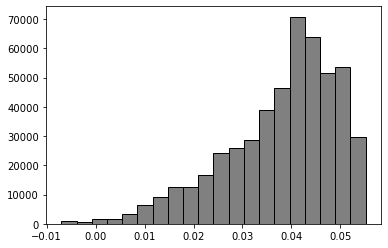

In [16]:
import pylab as pl

pl.hist(LR, bins = 20, edgecolor = 'black', facecolor = 'gray')
pl.show()

<h1 style="font-family:Comic Sans MS;color:white;background-color:#B9B9B9;text-align:center"> <span style="font-size:2em;font-weight:bold;padding-right: 60px;color:black;"> E.</span> Rendement moyen et Value at Risk</h1>

<div style="color:black;font-size:2em;font-weight:bold">Définition :</div> 
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px">Le  <b>rendement locatif moyen</b> est la moyenne d'un grand nombre de rendements locatifs simulés.
</blockquote>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">1.</span> Calculer le <b>rendement locatif moyen lorsque le loyer est de $700€$</b>. <em>(Utiliser la liste <code style="background-color:white">LR</code> créée précédemment)</em>.

In [17]:
import numpy as np

np.mean(LR)

0.03784020970873785

<div style="color:black;font-size:2em;font-weight:bold">Aide :</div> 
<blockquote style="border-left: 5px solid black;background-color:#DAF7A6;margin-left: 60px;padding-left: 30px">
    Le module <b>numpy</b> permet de calculer les paramètres statistiques d'une liste <code style='background-color:#DAF7A6'>L</code>.
<table style="border-width:2px;border-style:solid;border-color:black" width="420">
    <tr style="border:2px solid #F0573B;">
        <td style="border:2px solid black;text-align:center;"bgcolor='white'><b>Instruction</b></td>
           <td style="border:2px solid black;text-align:center;"bgcolor='white'><b>Permet d'obtenir</b></td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:left;"bgcolor='white'><code style='background-color:white'>np.mean(L)</code></td>
       <td style="border:2px solid black;text-align:left;"bgcolor='white'>la moyenne de <code style='background-color:white'>L</code></td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:left;"bgcolor='white'><code style='background-color:white'>np.std(L, ddof = 0)</code></td>
       <td style="border:2px solid black;text-align:left;"bgcolor='white'>l'écart-type de <code style='background-color:white'>L</code></td>
   </tr>
     <tr style="border:2px solid black;">
        <td style="border:2px solid black;text-align:left;"bgcolor='white'><code style='background-color:white'>np.quantile(L, p)</code></td>
       <td style="border:2px solid black;text-align:left;"bgcolor='white'>le <code style='background-color:white'>p</code>-ième quantile de <code style='background-color:white'>L</code></td>
   </tr>
</table>
</blockquote>

<div style="color:black;font-size:2em;font-weight:bold">Définition :</div> 
<blockquote style="background-color:#DDD;padding:10px;border-left: 4px solid;margin-left: 60px;padding-left: 30px"> La  <b>Value at Risk</b> à 5%, notée <b>Var</b>, est la valeur supérieure ou égale aux 5% des rendements les plus faibles.
</blockquote>

<span style="color:black;font-size:2em;font-weight:bold;padding-right: 30px;">2.</span> Calculer la <b>Var</b> du rendement locatif.

In [18]:
np.quantile(LR, 0.05)

0.015339805825242718